In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("superstore_data.csv")

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.info
df.isna().sum()


Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [5]:
df["Income"] = df["Income"].fillna(df["Income"].median())


In [6]:
cat_cols = ["Education", "Marital_Status"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [7]:
#Sanity check
#Check target balance
df["Response"].value_counts(normalize=True)


Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64

In [8]:
#Feature engineering, age 
df["Age"] = 2025 - df["Year_Birth"]


In [9]:
# feature engineering: Customer Tenure in years
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Tenure"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days / 365


In [10]:
# feature engineering Total spend
spend_cols = [
    "MntFishProducts", "MntMeatProducts", "MntFruits",
    "MntSweetProducts", "MntWines", "MntGoldProds"
]

df["TotalSpend"] = df[spend_cols].sum(axis=1)


In [11]:
#Total purchases

purchase_cols = [
    "NumDealsPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebPurchases"
]

df["TotalPurchases"] = df[purchase_cols].sum(axis=1)


In [12]:
df["Income"] = df["Income"].fillna(df["Income"].median())


In [13]:
df.head()


,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,TotalSpend,TotalPurchases
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,True,False,False,False,False,False,55,11.660274,1190,15
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,False,False,True,False,False,False,64,11.663014,577,18
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,False,True,False,False,False,False,67,11.753425,251,11
3,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,False,False,False,True,False,False,58,11.271233,11,4
4,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,False,False,True,False,False,False,36,11.526027,91,8


In [14]:
df.columns

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Age', 'Tenure', 'TotalSpend', 'TotalPurchases'],
      dtype='object')

In [15]:
df.shape
df.head()


,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Tenure,TotalSpend,TotalPurchases
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,True,False,False,False,False,False,55,11.660274,1190,15
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,False,False,True,False,False,False,64,11.663014,577,18
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,False,True,False,False,False,False,67,11.753425,251,11
3,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,False,False,False,True,False,False,58,11.271233,11,4
4,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,False,False,True,False,False,False,36,11.526027,91,8


In [16]:


df.filter(like="Education_").head()
df.filter(like="Marital_Status_").head()


,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False


In [17]:
#Feature selection
X = df.drop(columns=["Response", "Id", "Year_Birth", "Dt_Customer"])
y = df["Response"]


In [18]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [19]:
#Scale numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
#Build the model (Logistic Regression)

#We start with Logistic Regression because:

#Highly interpretable

##Perfect for marketing

#Business-friendly

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [21]:
#Evaluate the model
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [22]:
#Classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.91      0.95      0.93       477
           1       0.62      0.43      0.51        83

    accuracy                           0.88       560
   macro avg       0.76      0.69      0.72       560
weighted avg       0.86      0.88      0.87       560



In [23]:
#ROC-AUC (VERY important for marketing)
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


np.float64(0.8616983657902049)

In [24]:
#Feature importance (business gold)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance


,Feature,Coefficient
28,Tenure,0.532696
14,NumWebVisitsMonth,0.324582
12,NumCatalogPurchases,0.322940
4,MntWines,0.314988
19,Education_PhD,0.279060
29,TotalSpend,0.263398
9,MntGoldProds,0.231287
11,NumWebPurchases,0.205762
18,Education_Master,0.191911
6,MntMeatProducts,0.188167


In [25]:
#Probability scores essentially for PowerBI

df["Response_Probability"] = model.predict_proba(
    scaler.transform(X)
)[:, 1]

#Now each customer has:

#ID

#Actual Response

#Predicted Probability

#This is what we export to Power BI


In [34]:
#Save Results
df[["Id", "Response", "Response_Probability"]].to_csv(
    "customer_response_predictions.csv", index=False
)


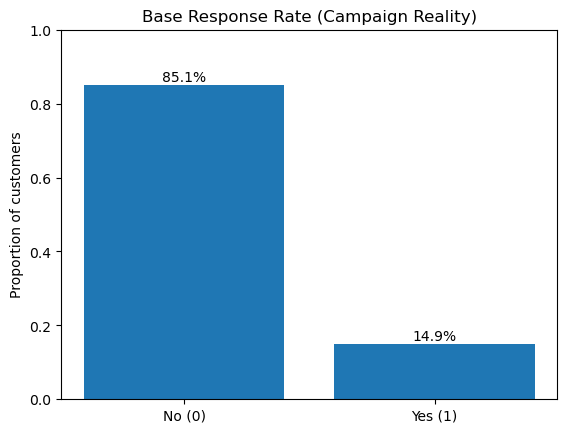

In [26]:
if "Response" in df.columns:
    rates = df["Response"].value_counts(normalize=True).sort_index()
    plt.figure()
    plt.bar(["No (0)", "Yes (1)"], rates.values)
    plt.title("Base Response Rate (Campaign Reality)")
    plt.ylabel("Proportion of customers")
    for i, v in enumerate(rates.values):
        plt.text(i, v + 0.01, f"{v*100:.1f}%", ha="center")
    plt.ylim(0, 1)
    plt.show()


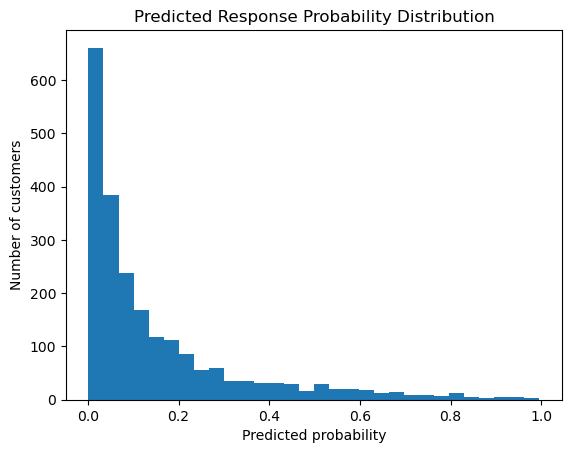

In [28]:
#Model output probability distribution
plt.figure()
plt.hist(df["Response_Probability"], bins=30)
plt.title("Predicted Response Probability Distribution")
plt.xlabel("Predicted probability")
plt.ylabel("Number of customers")
plt.show()


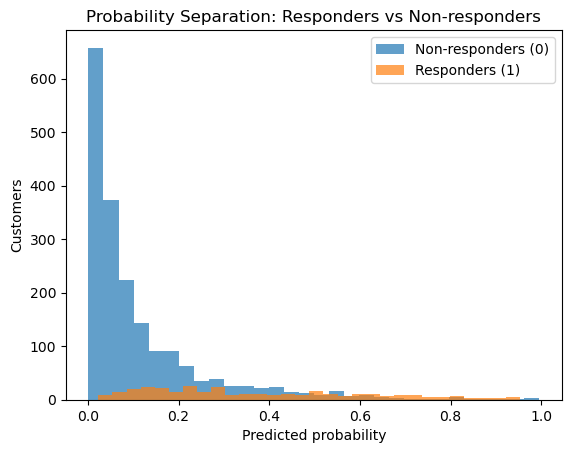

In [29]:
#Responders vs non responders : probabilty separation

if "Response" in df.columns:
    plt.figure()
    plt.hist(df.loc[df["Response"]==0, "Response_Probability"], bins=30, alpha=0.7, label="Non-responders (0)")
    plt.hist(df.loc[df["Response"]==1, "Response_Probability"], bins=30, alpha=0.7, label="Responders (1)")
    plt.title("Probability Separation: Responders vs Non-responders")
    plt.xlabel("Predicted probability")
    plt.ylabel("Customers")
    plt.legend()
    plt.show()


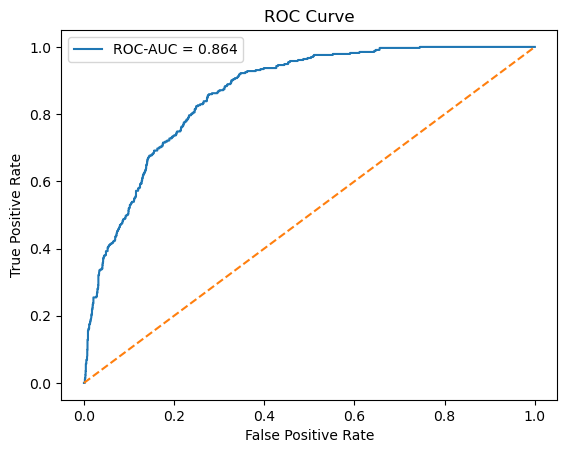

In [31]:
#Model performance: ROC +AUC
if "Response" in df.columns:
    y_true = df["Response"].values
    y_score = df["Response_Probability"].values

    auc = roc_auc_score(y_true, y_score)
    fpr, tpr, _ = roc_curve(y_true, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC-AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


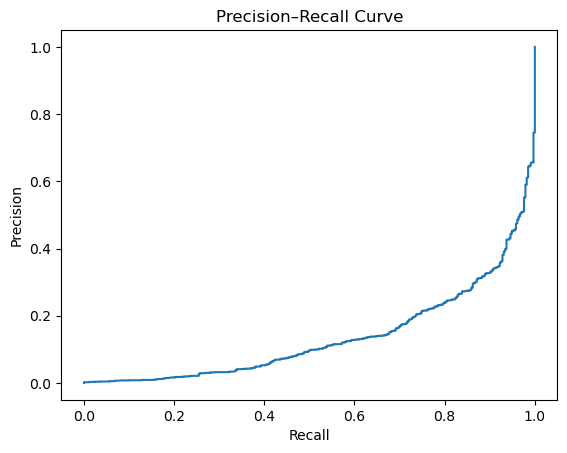

In [34]:
#Precision Recall 
if "Response" in df.columns:
    pr, rc, _ = roc_curve(y_true, y_score)

    plt.figure()
    plt.plot(rc, pr)
    plt.title("Precision–Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()


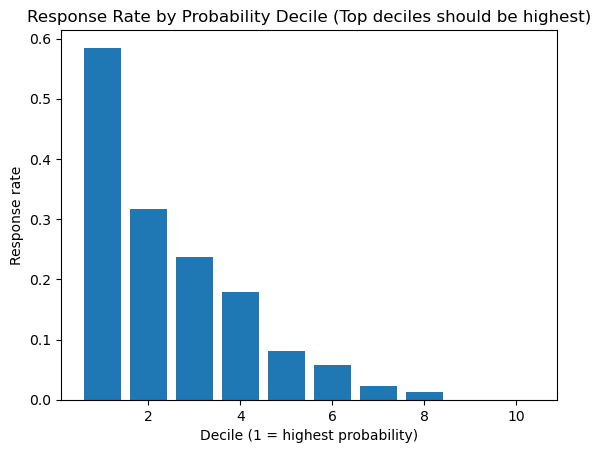

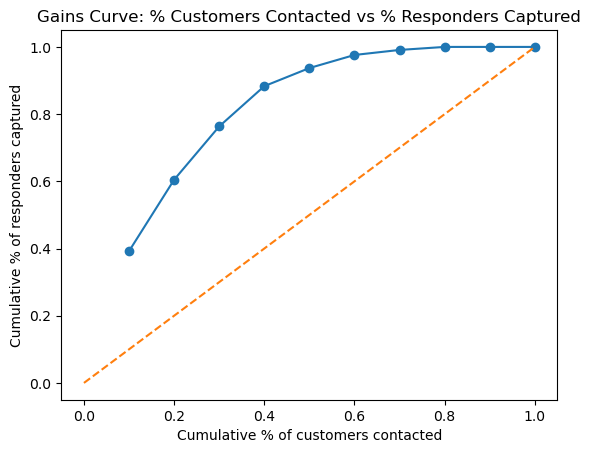

In [35]:
if "Response" in df.columns:
    temp = df.sort_values("Response_Probability", ascending=False).reset_index(drop=True).copy()
    temp["decile"] = pd.qcut(temp["Response_Probability"], 10, labels=False, duplicates="drop")
    dec = (temp.groupby("decile")
           .agg(customers=("decile","count"), responders=("Response","sum"), avg_score=("Response_Probability","mean"))
           .reset_index())

    dec = dec.sort_values("decile", ascending=False).reset_index(drop=True)
    base_rate = temp["Response"].mean()
    dec["response_rate"] = dec["responders"] / dec["customers"]
    dec["lift"] = dec["response_rate"] / base_rate

    # Bar chart: response rate by decile
    plt.figure()
    plt.bar(range(1, len(dec)+1), dec["response_rate"].values)
    plt.title("Response Rate by Probability Decile (Top deciles should be highest)")
    plt.xlabel("Decile (1 = highest probability)")
    plt.ylabel("Response rate")
    plt.show()

    # Gains curve
    dec["cum_customers"] = dec["customers"].cumsum()
    dec["cum_responders"] = dec["responders"].cumsum()
    dec["cum_pop"] = dec["cum_customers"] / dec["customers"].sum()
    dec["cum_gain"] = dec["cum_responders"] / dec["responders"].sum()

    plt.figure()
    plt.plot(dec["cum_pop"], dec["cum_gain"], marker="o")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title("Gains Curve: % Customers Contacted vs % Responders Captured")
    plt.xlabel("Cumulative % of customers contacted")
    plt.ylabel("Cumulative % of responders captured")
    plt.show()

    dec[["decile","customers","responders","response_rate","lift","avg_score"]]


In [37]:
spend_cols = ["MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines","MntGoldProds"]
if all(c in df.columns for c in spend_cols) and "TotalSpend" not in df.columns:
    df["TotalSpend"] = df[spend_cols].sum(axis=1)


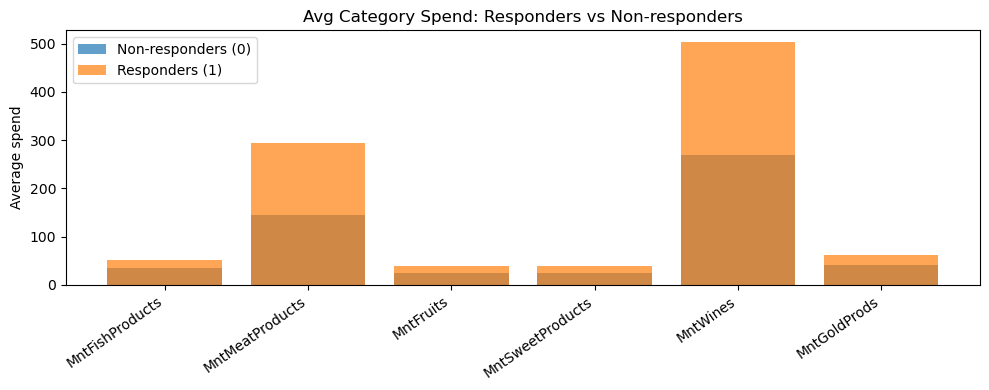

In [38]:
if "Response" in df.columns and all(c in df.columns for c in spend_cols):
    means = df.groupby("Response")[spend_cols].mean().T
    plt.figure(figsize=(10,4))
    plt.bar(means.index, means[0], alpha=0.7, label="Non-responders (0)")
    plt.bar(means.index, means[1], alpha=0.7, label="Responders (1)")
    plt.title("Avg Category Spend: Responders vs Non-responders")
    plt.ylabel("Average spend")
    plt.xticks(rotation=35, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\tmmak\AppData\Local\Temp\ipykernel_24840\25055662.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("recency_bin")["Response_Probability"].mean().reset_index()


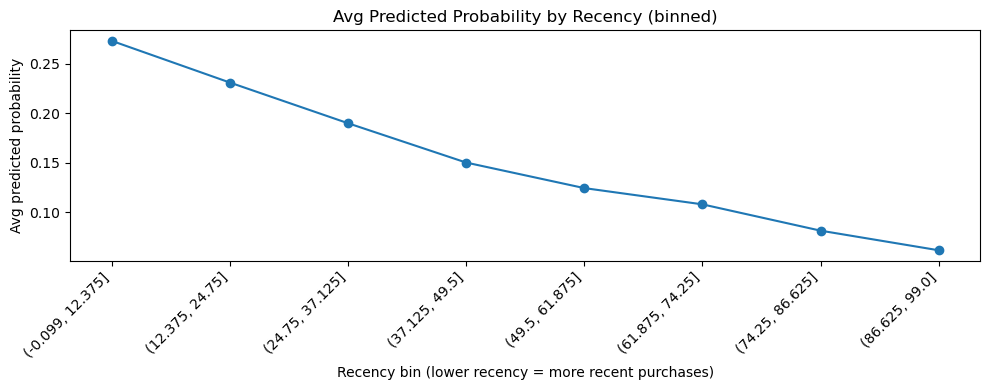

In [39]:
if "Recency" in df.columns:
    tmp = df.copy()
    tmp["recency_bin"] = pd.cut(tmp["Recency"], bins=8)
    g = tmp.groupby("recency_bin")["Response_Probability"].mean().reset_index()

    plt.figure(figsize=(10,4))
    plt.plot(range(len(g)), g["Response_Probability"], marker="o")
    plt.title("Avg Predicted Probability by Recency (binned)")
    plt.xlabel("Recency bin (lower recency = more recent purchases)")
    plt.ylabel("Avg predicted probability")
    plt.xticks(range(len(g)), [str(b) for b in g["recency_bin"]], rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


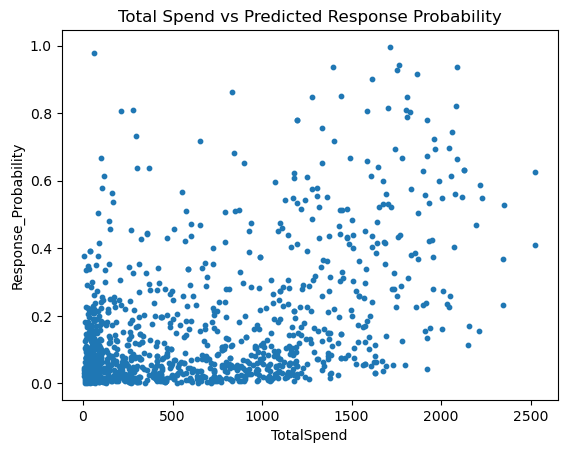

In [40]:
if "TotalSpend" in df.columns:
    sample = df.sample(min(len(df), 1200), random_state=42)
    plt.figure()
    plt.scatter(sample["TotalSpend"], sample["Response_Probability"], s=10)
    plt.title("Total Spend vs Predicted Response Probability")
    plt.xlabel("TotalSpend")
    plt.ylabel("Response_Probability")
    plt.show()


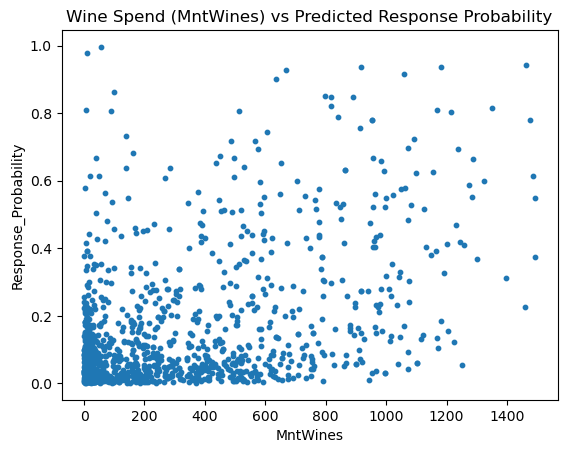

In [41]:
if "MntWines" in df.columns:
    sample = df.sample(min(len(df), 1200), random_state=42)
    plt.figure()
    plt.scatter(sample["MntWines"], sample["Response_Probability"], s=10)
    plt.title("Wine Spend (MntWines) vs Predicted Response Probability")
    plt.xlabel("MntWines")
    plt.ylabel("Response_Probability")
    plt.show()


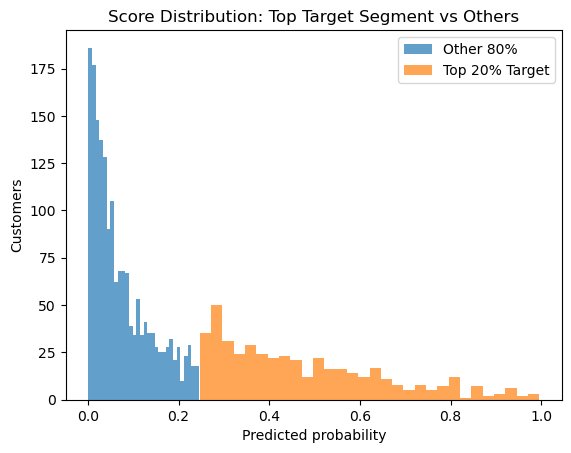

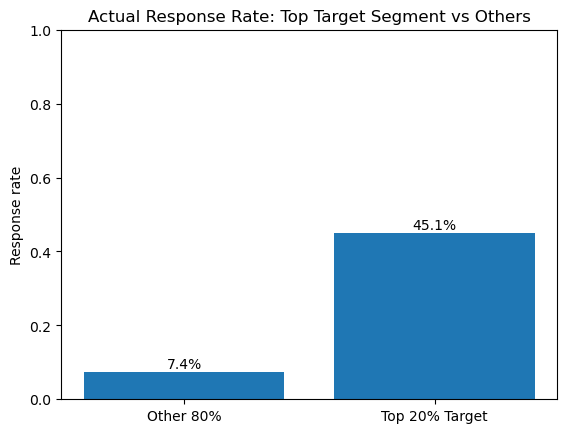

Segment
Other 80%         0.073661
Top 20% Target    0.450893
Name: Response, dtype: float64


In [42]:
top_pct = 20
temp = df.sort_values("Response_Probability", ascending=False).reset_index(drop=True).copy()
n_top = int(np.ceil(len(temp) * top_pct / 100))
temp["Segment"] = "Other 80%"
temp.loc[:n_top-1, "Segment"] = "Top 20% Target"

plt.figure()
plt.hist(temp.loc[temp["Segment"]=="Other 80%", "Response_Probability"], bins=30, alpha=0.7, label="Other 80%")
plt.hist(temp.loc[temp["Segment"]=="Top 20% Target", "Response_Probability"], bins=30, alpha=0.7, label="Top 20% Target")
plt.title("Score Distribution: Top Target Segment vs Others")
plt.xlabel("Predicted probability")
plt.ylabel("Customers")
plt.legend()
plt.show()

if "Response" in temp.columns:
    seg_rate = temp.groupby("Segment")["Response"].mean()
    plt.figure()
    plt.bar(seg_rate.index, seg_rate.values)
    plt.title("Actual Response Rate: Top Target Segment vs Others")
    plt.ylabel("Response rate")
    for i, v in enumerate(seg_rate.values):
        plt.text(i, v + 0.01, f"{v*100:.1f}%", ha="center")
    plt.ylim(0, 1)
    plt.show()

    print(seg_rate)


In [35]:
#“I built a customer response prediction model using Logistic Regression,
#engineered behavioral and spending features,
#evaluated performance using ROC-AUC, and produced probability scores for campaign targeting.”